In [1]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_bins = 10

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [4]:
import os

In [5]:
os.getcwd()

'/Users/sree/Downloads/PGP_AIML/Sample Programs/04-21_Week3-EnsembleTechniques'

In [6]:
EST_df = pd.read_csv('/Users/sree/Downloads/PGP_AIML/DataSets/04-21_Week3-EnsembleTechniques/TelcomCustomer-Churn.csv')

In [7]:
EST_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print(EST_df.info(),'\n')
print(EST_df.dtypes,'\n')
print(EST_df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print("\n\n gender column unique values \n\n")
print(EST_df.gender.unique())
print("\n\n SeniorCitizen column unique values \n\n")
print(EST_df.SeniorCitizen.unique())
print("\n\n Partner column unique values \n\n")
print(EST_df.Partner.unique())
print("\n\n Dependents column unique values \n\n")
print(EST_df.Dependents.unique())
print("\n\n PhoneService column unique values \n\n")
print(EST_df.PhoneService.unique())
print("\n\n MultipleLines column unique values \n\n")
print(EST_df.MultipleLines.unique())
print("\n\n InternetService column unique values \n\n")
print(EST_df.InternetService.unique())
print("\n\n OnlineSecurity column unique values \n\n")
print(EST_df.OnlineSecurity.unique())
print("\n\n OnlineBackup  column unique values \n\n")
print(EST_df.OnlineBackup.unique())
print("\n\n DeviceProtection column unique values \n\n")
print(EST_df.DeviceProtection.unique())
print("\n\n TechSupport column unique values \n\n")
print(EST_df.TechSupport.unique())
print("\n\n StreamingTV column unique values \n\n")
print(EST_df.StreamingTV.unique())
print("\n\n StreamingMovies column unique values \n\n")
print(EST_df.StreamingMovies.unique())
print("\n\n Contract column unique values \n\n")
print(EST_df.Contract.unique())
print("\n\n PaperlessBilling column unique values \n\n")
print(EST_df.PaperlessBilling.unique())
print("\n\n PaymentMethod column unique values \n\n")
print(EST_df.PaymentMethod.unique())
print("\n\n Churn column unique values \n\n")
print(EST_df.Churn.unique())



 gender column unique values 


['Female' 'Male']


 SeniorCitizen column unique values 


[0 1]


 Partner column unique values 


['Yes' 'No']


 Dependents column unique values 


['No' 'Yes']


 PhoneService column unique values 


['No' 'Yes']


 MultipleLines column unique values 


['No phone service' 'No' 'Yes']


 InternetService column unique values 


['DSL' 'Fiber optic' 'No']


 OnlineSecurity column unique values 


['No' 'Yes' 'No internet service']


 OnlineBackup  column unique values 


['Yes' 'No' 'No internet service']


 DeviceProtection column unique values 


['No' 'Yes' 'No internet service']


 TechSupport column unique values 


['No' 'Yes' 'No internet service']


 StreamingTV column unique values 


['No' 'Yes' 'No internet service']


 StreamingMovies column unique values 


['No' 'Yes' 'No internet service']


 Contract column unique values 


['Month-to-month' 'One year' 'Two year']


 PaperlessBilling column unique values 


['Yes' 'No']


 PaymentMeth

In [10]:
print("\n\n",EST_df.columns,"\n\n")
print("\n\n",EST_df.shape,"\n\n")



 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object') 




 (7043, 21) 




In [11]:
print(EST_df.gender.value_counts())
print(EST_df.SeniorCitizen.value_counts())
print(EST_df.Partner.value_counts())
print(EST_df.Dependents.value_counts())
print(EST_df.PhoneService.value_counts())
print(EST_df.MultipleLines.value_counts())
print(EST_df.InternetService.value_counts())
print(EST_df.OnlineSecurity.value_counts())
print(EST_df.OnlineBackup.value_counts())
print(EST_df.DeviceProtection.value_counts())
print(EST_df.TechSupport.value_counts())
print(EST_df.StreamingTV.value_counts())
print(EST_df.StreamingMovies.value_counts())
print(EST_df.Contract.value_counts())
print(EST_df.PaperlessBilling.value_counts())
print(EST_df.PaymentMethod.value_counts())
print(EST_df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

Lets convert the columns with an 'object' datatype into categorical variables

In [12]:
for feature in EST_df.columns: # Loop through all columns in the dataframe
    if EST_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        EST_df[feature] = pd.Categorical(EST_df[feature])# Replace strings with an integer

EST_df['TotalCharges'] = EST_df['TotalCharges'].astype('object')
EST_df['TotalCharges'] = pd.to_numeric(EST_df['TotalCharges'],errors='coerce')  
EST_df = EST_df.dropna(axis = 0)
print(EST_df.shape)
#EST_df['TotalCharges'] = EST_df['TotalCharges'].replace({np.NaN:0})
print(EST_df.head(5))

(7032, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [13]:
replaceStruct = {
                 "PaperlessBilling": {"No": 0, "Yes": 1 },
                 "Contract": {"Month-to-month": 1, "One year": 2,"Two year": 3 }, 
                 "StreamingMovies": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "StreamingTV": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "TechSupport": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "DeviceProtection": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "OnlineBackup": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "OnlineSecurity": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "InternetService": {"Fiber optic": 1, "DSL": 2,"No": -1 },
                 "MultipleLines": {"No": 0, "Yes": 1,"No phone service": -1 },
                 "PhoneService": {"No": 0, "Yes": 1 },
                 "Dependents": {"No": 0, "Yes": 1 },
                 "Partner":     {"No": 0, "Yes": 1 },
                 "gender":     {"Female": 0, "Male": 1 },
                 "Churn": {"No": 0.0, "Yes": 1.0 }
                    }
oneHotCols=["PaymentMethod"]


EST_df=EST_df.replace(replaceStruct)
EST_df=pd.get_dummies(EST_df, columns=oneHotCols)
EST_df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,-1,2,0,...,0,1,1,29.85,29.85,0.0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,0,2,0,56.95,1889.50,0.0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,1,1,53.85,108.15,1.0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,-1,2,1,...,0,2,0,42.30,1840.75,0.0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,1,1,70.70,151.65,1.0,0,0,1,0


In [14]:
print("Info about DataFrame\n\n")
print(EST_df.info(),'\n')
print("Datatypes in DataFrame\n\n")
print(EST_df.dtypes,'\n')
print("Describing the data trends in the DataFrame\n\n")
print(EST_df.describe(),'\n')
print("Shape of the DataFrame\n\n")
print(EST_df.shape,'\n')

Info about DataFrame


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   category
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   int64   
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   InternetService                          7032 non-null   int64   
 9   OnlineSecurity                           7032 non-null   int64   
 10  OnlineBackup 

In [15]:
print(EST_df[EST_df['TotalCharges']==0].shape)
EST_df

(0, 24)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,-1,2,0,...,0,1,1,29.85,29.85,0.0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,0,2,0,56.95,1889.50,0.0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,1,1,53.85,108.15,1.0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,-1,2,1,...,0,2,0,42.30,1840.75,0.0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,1,1,70.70,151.65,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,2,1,...,1,2,1,84.80,1990.50,0.0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,2,1,103.20,7362.90,0.0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,-1,2,1,...,0,1,1,29.60,346.45,0.0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,1,1,74.40,306.60,1.0,0,0,0,1


# Univariate, Bivariate Analysis and Multivariate Analyses

In [16]:
EST_df['customerID'] = EST_df['customerID'].astype('object')
EST_df['customerID'] = EST_df['customerID'].astype('string')
#EST_df['customerID'] = EST_df['customerID'].str.extract(r'^(-?\d+)', expand=False).astype(float)
#print(EST_df['customerID'].head())
#print(EST_df.customerID.value_counts())

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

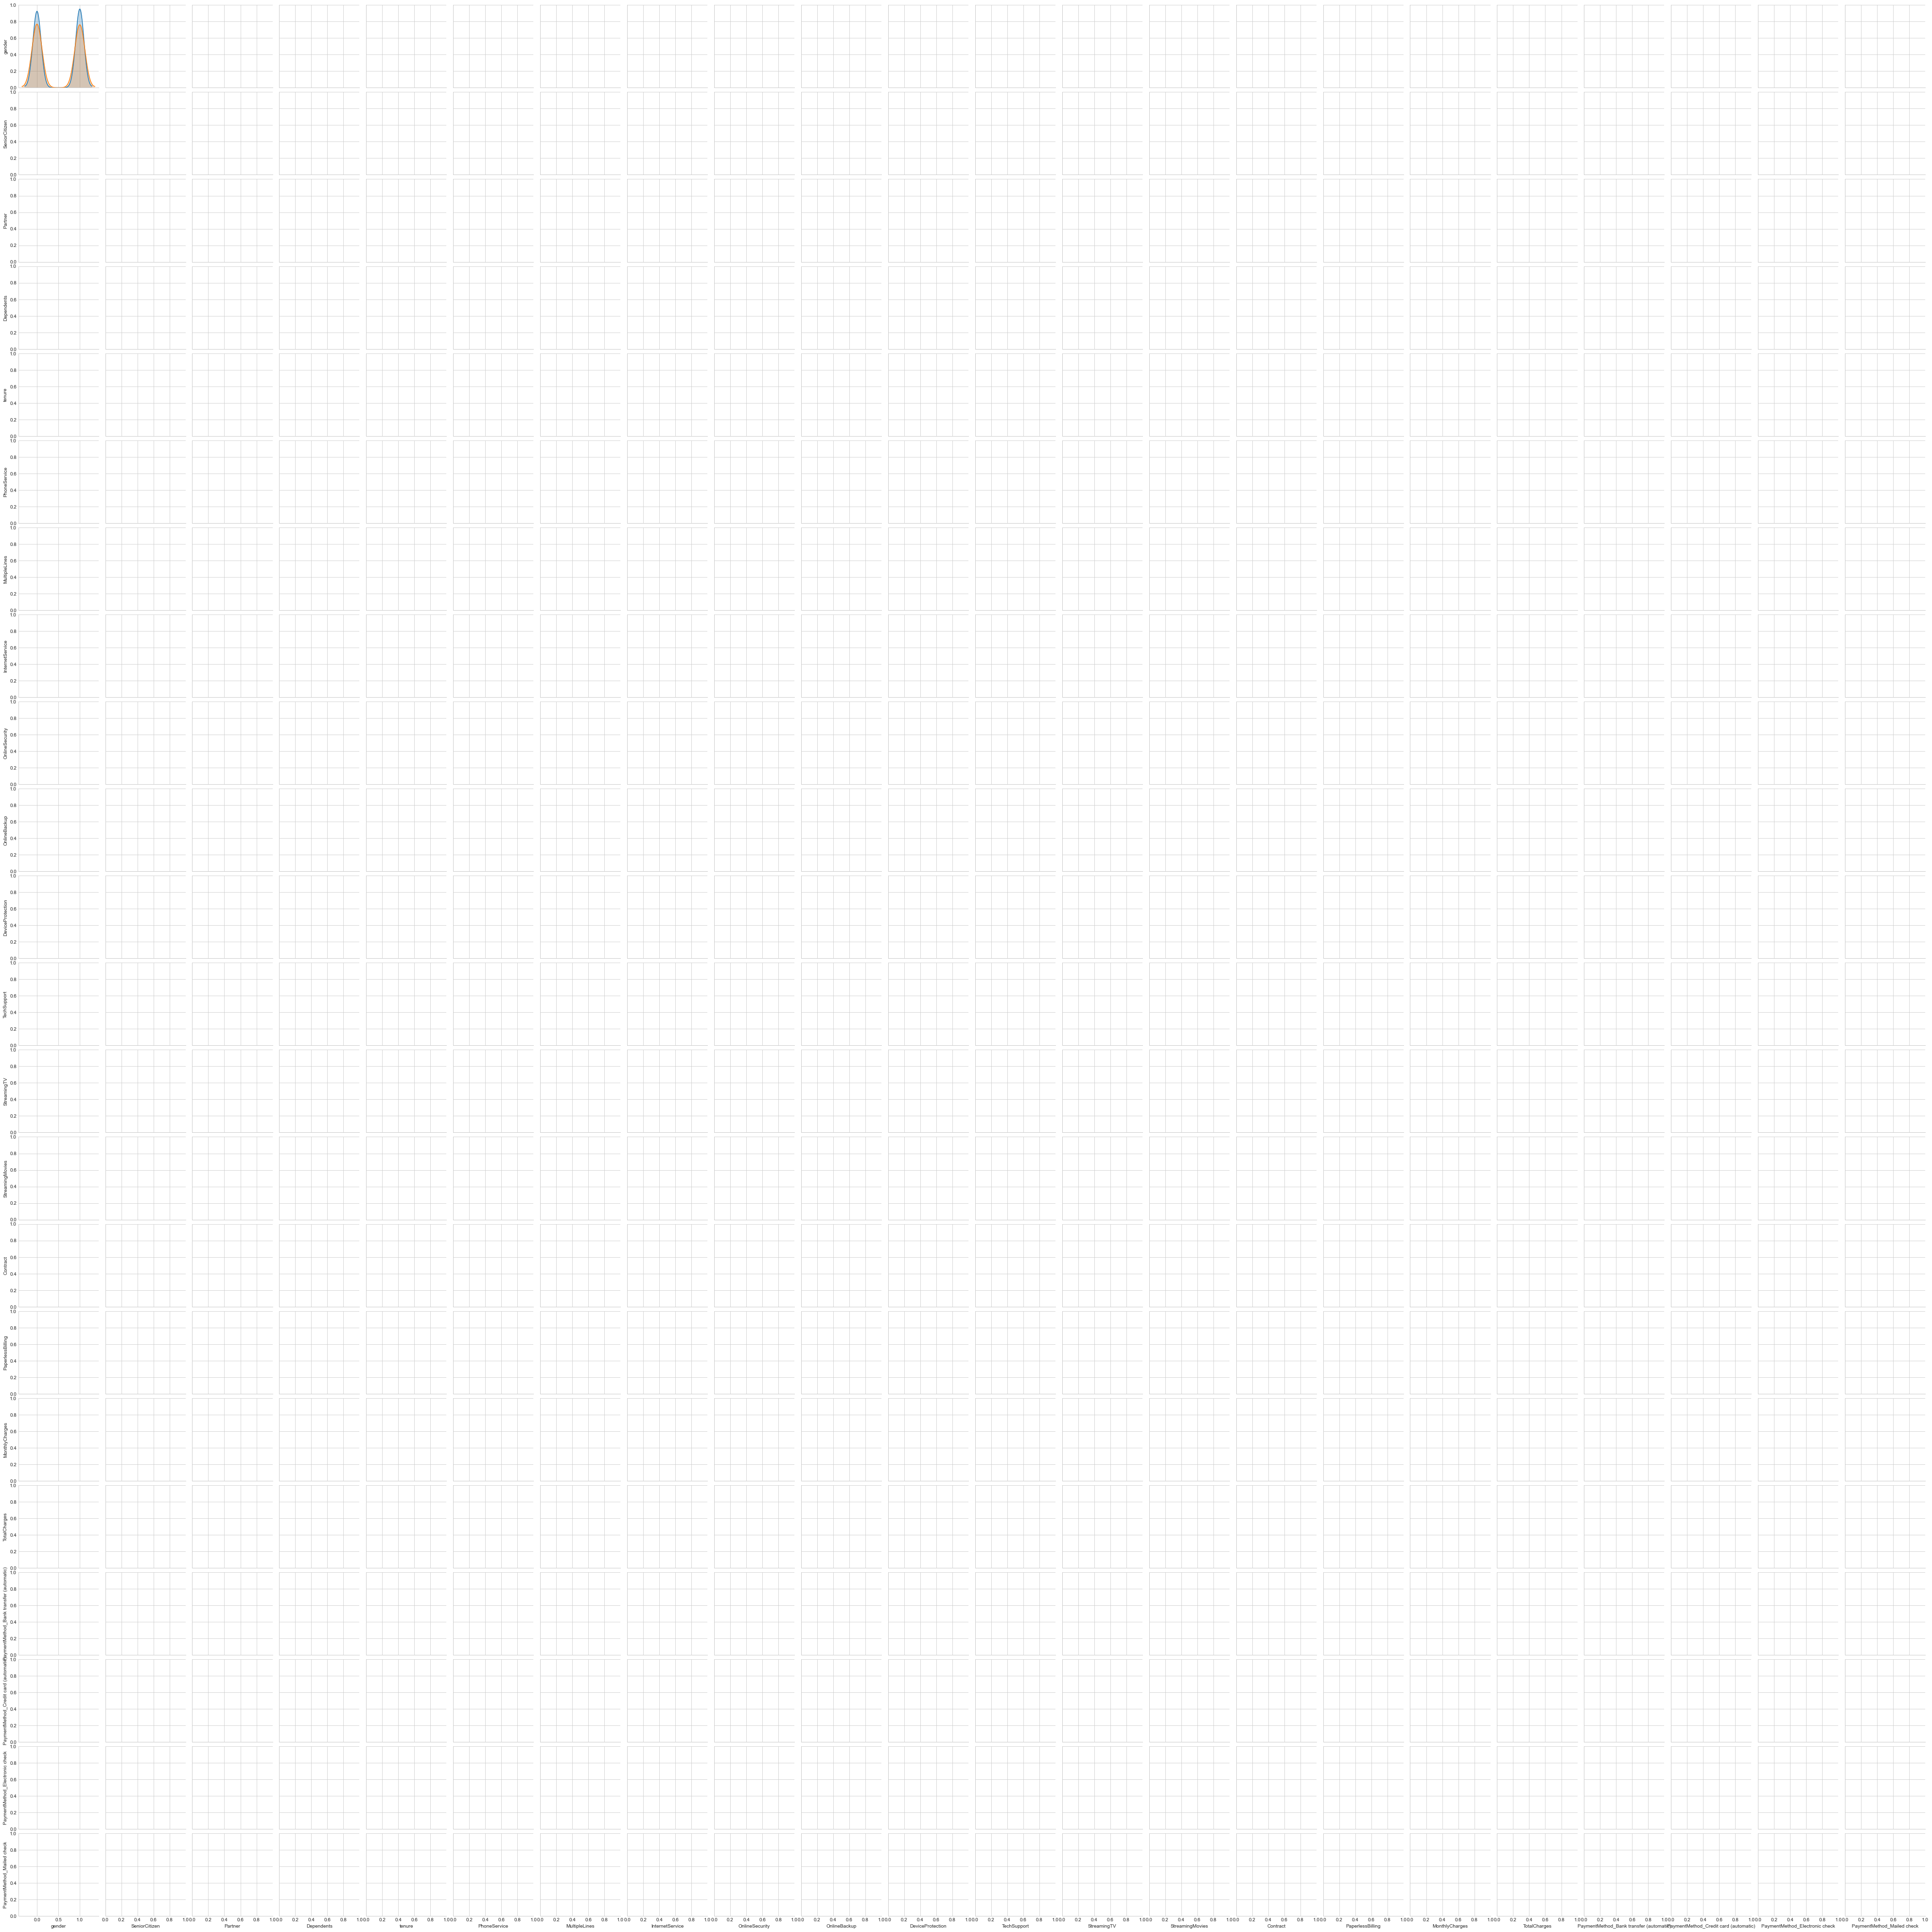

In [18]:
sns.pairplot(EST_df,hue ='Churn')
plt.show()

In [ ]:
sns.FacetGrid(EST_df,hue ='Churn',size = 5).map(sns.distplot,"MonthlyCharges").add_legend()
plt.show()

In [ ]:
sns.FacetGrid(EST_df,hue ='Churn',size = 5).map(sns.distplot,"tenure").add_legend()
plt.show()

In [ ]:
sns.boxplot(x= "Churn",y = "MonthlyCharges", data = EST_df)
plt.show()

In [ ]:
sns.boxplot(x= "Churn",y = "tenure", data = EST_df)
plt.show()

In [ ]:
sns.violinplot(x= "Churn",y = "MonthlyCharges", data = EST_df, size = 8)
plt.show()

In [ ]:
sns.violinplot(x= "Churn",y = "tenure", data = EST_df,size = 8)
plt.show()

## Split Data

## Excluding Customer ID from Feature set as it is mere Unique ID just like row index for each customer which does not have any duplicates and its inclusion does not add any significant value for our analysis

In [18]:
X0 = EST_df.drop("customerID", axis=1)
y = X0.pop("Churn")
X = X0
#.drop("Churn" , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Build Decision Tree Model 

# We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [19]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [20]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.9979683055668428
0.723696682464455


## Visualizing the Decision Tree

In [21]:
train_char_label = ['No', 'Yes']
EST_df_Tree_File = open('EST_df_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=EST_df_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
EST_df_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [ ]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng EST_df_tree.dot -o EST_df_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("EST_df_tree.png"))


## Reducing over fitting (Regularization)

In [22]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print("\n\nAccuracy on training data \n\n")
print(dTreeR.score(X_train, y_train))
print("\n\nAccuracy on test data \n\n")
print(dTreeR.score(X_test, y_test))



Accuracy on training data 


0.7824055262088582


Accuracy on test data 


0.7971563981042654


In [ ]:
train_char_label = ['No', 'Yes']
EST_df_Tree_File = open('EST_df_tree.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=EST_df_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
EST_df_Tree_File.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng EST_df_tree.dot -o EST_df_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("EST_df_tree.png"))


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [ ]:
print("Efficiency/Accuracy of the model on test data is \n\n")
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

In [ ]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted Churned\n\n',
      len(y_predict[y_predict==1]),'\n\n')
print('Count of observed Churned\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted Retained\n\n',
      len(y_predict[y_predict==0]),'\n\n')
print('Count of observed Retained\n\n',
      len(y_test[y_test == 0]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedChurned", "PredictedRetained"]],
                      columns = [i for i in ["ObservedChurned", "ObservedRetained"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

#                             Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1) #Using base estimator is optional
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted Churned\n\n',
      len(y_predict[y_predict==1]),'\n\n')
print('Count of observed Churned\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted Retained\n\n',
      len(y_predict[y_predict==0]),'\n\n')
print('Count of observed Retained\n\n',
      len(y_test[y_test == 0]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedChurned", "PredictedRetained"]],
                      columns = [i for i in ["ObservedChurned", "ObservedRetained"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

# Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))


# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted Churned\n\n',
      len(y_predict[y_predict==1]),'\n\n')
print('Count of observed Churned\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted Retained\n\n',
      len(y_predict[y_predict==0]),'\n\n')
print('Count of observed Retained\n\n',
      len(y_test[y_test == 0]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedChurned", "PredictedRetained"]],
                      columns = [i for i in ["ObservedChurned", "ObservedRetained"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

#                     Ensemble Learning - GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))


# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted Churned\n\n',
      len(y_predict[y_predict==1]),'\n\n')
print('Count of observed Churned\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted Retained\n\n',
      len(y_predict[y_predict==0]),'\n\n')
print('Count of observed Retained\n\n',
      len(y_test[y_test == 0]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedChurned", "PredictedRetained"]],
                      columns = [i for i in ["ObservedChurned", "ObservedRetained"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

# Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))


# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('Count of predicted Churned\n\n',
      len(y_predict[y_predict==1]),'\n\n')
print('Count of observed Churned\n\n',
      len(y_test[y_test == 1]),'\n\n')

print('Count of predicted Retained\n\n',
      len(y_predict[y_predict==0]),'\n\n')
print('Count of observed Retained\n\n',
      len(y_test[y_test == 0]),'\n\n')


print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


print(cm.transpose())

df_cm = pd.DataFrame(cm.transpose(), index = [i for i in ["PredictedChurned", "PredictedRetained"]],
                      columns = [i for i in ["ObservedChurned", "ObservedRetained"]])
print('\n\n')
print(df_cm)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cm, annot=True, fmt='g', ax = ax)

## Reducing Overfitting (Regularization)

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print("\n\nAccuracy on training data \n\n")
print(dTreeR.score(X_train, y_train))
print("\n\nAccuracy on test data \n\n")
print(dTreeR.score(X_test, y_test))

In [ ]:
print(X_test.head(1))

In [23]:
import tkinter as tk

from tkinter import ttk

In [24]:
import tkinter as tk

from tkinter import ttk


win = tk.Tk()

win.title('Telecom Company Customer Churn Data')

#Column 1 
Gender=ttk.Label(win,text="gender")
Gender.grid(row=0,column=0,sticky=tk.W)
Gender_var=tk.StringVar(win)
# Dictionary with options
choices = { 'Female','Male'}
Gender_var.set('Female') # set the default option
popupMenu = tk.OptionMenu(win, Gender_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Gender_var.get() )
# link function to change dropdown
Gender_var.trace('w', change_dropdown)
popupMenu.grid(row=0,column=1)


#Column 2
SC=ttk.Label(win,text="Senior Citizen")
SC.grid(row=1,column=0,sticky=tk.W)
SC_var=tk.StringVar(win)
# Dictionary with options
choices = { '0','1'}
SC_var.set('0') # set the default option
popupMenu = tk.OptionMenu(win, SC_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( SC_var.get() )
# link function to change dropdown
SC_var.trace('w', change_dropdown)
popupMenu.grid(row=1,column=1)


#Column 3
Ptnr=ttk.Label(win,text="Partner")
Ptnr.grid(row=2,column=0,sticky=tk.W)
Ptnr_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes'}
Ptnr_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, Ptnr_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Ptnr_var.get() )
# link function to change dropdown
Ptnr_var.trace('w', change_dropdown)
popupMenu.grid(row=2,column=1)


#Column 4
Dep=ttk.Label(win,text="Dependents")
Dep.grid(row=3,column=0,sticky=tk.W)
Dep_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes'}
Dep_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, Dep_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Dep_var.get() )
# link function to change dropdown
Dep_var.trace('w', change_dropdown)
popupMenu.grid(row=3,column=1)


#Column 5
Tre=ttk.Label(win,text="Tenure")
Tre.grid(row=4,column=0,sticky=tk.W)
Tre_var=tk.StringVar(win)
Tre_entrybox=ttk.Entry(win,width=16,textvariable=Tre_var)
Tre_entrybox.grid(row=4,column=1)


#Column 6
PS=ttk.Label(win,text="PhoneService")
PS.grid(row=5,column=0,sticky=tk.W)
PS_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes'}
PS_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, PS_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( PS_var.get() )
# link function to change dropdown
PS_var.trace('w', change_dropdown)
popupMenu.grid(row=5,column=1)


#Column 7
ML=ttk.Label(win,text="MultipleLines")
ML.grid(row=6,column=0,sticky=tk.W)
ML_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No phone service'}
ML_var.set('No phone service') # set the default option
popupMenu = tk.OptionMenu(win, ML_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( ML_var.get() )
# link function to change dropdown
ML_var.trace('w', change_dropdown)
popupMenu.grid(row=6,column=1)


#Column 8
IS=ttk.Label(win,text="InternetService")
IS.grid(row=7,column=0,sticky=tk.W)
IS_var=tk.StringVar(win)
# Dictionary with options
choices = { 'Fiber optic','DSL','No'}
IS_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, IS_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( IS_var.get() )
# link function to change dropdown
IS_var.trace('w', change_dropdown)
popupMenu.grid(row=7,column=1)


#Column 9 
OS=ttk.Label(win,text="OnlineSecurity")
OS.grid(row=8,column=0,sticky=tk.W)
OS_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
OS_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, OS_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( OS_var.get() )
# link function to change dropdown
OS_var.trace('w', change_dropdown)
popupMenu.grid(row=8,column=1)


#Column 10
OB=ttk.Label(win,text="OnlineBackup")
OB.grid(row=9,column=0,sticky=tk.W)
OB_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
OB_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, OB_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( OB_var.get() )
# link function to change dropdown
OB_var.trace('w', change_dropdown)
popupMenu.grid(row=9,column=1)


#Column 11
DP=ttk.Label(win,text="DeviceProtection")
DP.grid(row=10,column=0,sticky=tk.W)
DP_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
DP_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, DP_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( DP_var.get() )
# link function to change dropdown
DP_var.trace('w', change_dropdown)
popupMenu.grid(row=10,column=1)


#Column 12
TS=ttk.Label(win,text="TechSupport")
TS.grid(row=11,column=0,sticky=tk.W)
TS_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
TS_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, TS_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( TS_var.get() )
# link function to change dropdown
TS_var.trace('w', change_dropdown)
popupMenu.grid(row=11,column=1)


#Column 13
STV=ttk.Label(win,text="StreamingTV")
STV.grid(row=12,column=0,sticky=tk.W)
STV_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
STV_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, STV_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( STV_var.get() )
# link function to change dropdown
STV_var.trace('w', change_dropdown)
popupMenu.grid(row=12,column=1)



#Column 14
SM=ttk.Label(win,text="StreamingMovies")
SM.grid(row=13,column=0,sticky=tk.W)
SM_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes','No internet service'}
SM_var.set('No internet service') # set the default option
popupMenu = tk.OptionMenu(win, SM_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( SM_var.get() )
# link function to change dropdown
SM_var.trace('w', change_dropdown)
popupMenu.grid(row=13,column=1)



#Column 15
Ctrt=ttk.Label(win,text="Contract")
Ctrt.grid(row=14,column=0,sticky=tk.W)
Ctrt_var=tk.StringVar(win)
# Dictionary with options
choices = { 'Month-to-month','One year','Two year'}
Ctrt_var.set('Month-to-month') # set the default option
popupMenu = tk.OptionMenu(win, Ctrt_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Ctrt_var.get() )
# link function to change dropdown
Ctrt_var.trace('w', change_dropdown)
popupMenu.grid(row=14,column=1)



#Column 16
Plb=ttk.Label(win,text="PaperlessBilling")
Plb.grid(row=15,column=0,sticky=tk.W)
Plb_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes'}
Plb_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, Plb_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Plb_var.get() )
# link function to change dropdown
Plb_var.trace('w', change_dropdown)
popupMenu.grid(row=15,column=1)



#Column 17
MC=ttk.Label(win,text="MonthlyCharges")
MC.grid(row=16,column=0,sticky=tk.W)
MC_var=tk.StringVar(win)
MC_entrybox=ttk.Entry(win,width=16,textvariable=MC_var)
MC_entrybox.grid(row=16,column=1)

#Column 18
TC=ttk.Label(win,text="TotalCharges")
TC.grid(row=17,column=0,sticky=tk.W)
TC_var=tk.StringVar()
TC_entrybox=ttk.Entry(win,width=16,textvariable=TC_var)
TC_entrybox.grid(row=17,column=1)


#Column 19
PMBta=ttk.Label(win,text="PaymentMethod")
PMBta.grid(row=18,column=0,sticky=tk.W)
PMBta_var=tk.StringVar(win)
# Dictionary with options
choices = { 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'}
PMBta_var.set('Electronic check') # set the default option
popupMenu = tk.OptionMenu(win, PMBta_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( PMBta_var.get() )
# link function to change dropdown
PMBta_var.trace('w', change_dropdown)
popupMenu.grid(row=18,column=1)



#Column 20
Ch=ttk.Label(win,text="Churn")
Ch.grid(row=19,column=0,sticky=tk.W)
Ch_var=tk.StringVar(win)
# Dictionary with options
choices = { 'No','Yes'}
Ch_var.set('No') # set the default option
popupMenu = tk.OptionMenu(win, Ch_var, *choices)
# on change dropdown value
def change_dropdown(*args):
    print( Ch_var.get() )
# link function to change dropdown
Ch_var.trace('w', change_dropdown)
popupMenu.grid(row=19,column=1)




import pandas as pd
DF = pd.DataFrame()

    
def Submit():
        
    
        import pandas as pd
        DF = pd.DataFrame()
        DF = pd.DataFrame(columns=['gender',  'SeniorCitizen',  'Partner',  'Dependents',  'tenure',  
                               'PhoneService','MultipleLines',  'InternetService',  'OnlineSecurity',  
                               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 
                               'StreamingMovies',  'Contract',  'PaperlessBilling','MonthlyCharges',
                               'TotalCharges','PaymentMethod'])
        
        Gender=Gender_var.get()
    
        SC=SC_var.get()
    
        Ptnr=Ptnr_var.get()
    
        Dep=Dep_var.get()
    
        Tre=Tre_var.get()
    
        PS=PS_var.get()
    
        ML=ML_var.get()
    
        IS=IS_var.get()
    
    
        OS=OS_var.get()
    
        OB=OB_var.get()
    
        DP=DP_var.get()
    
        TS=TS_var.get()
    
        STV=STV_var.get()
    
        SM=SM_var.get()
    
        Ctrt=Ctrt_var.get()
    
        Plb=Plb_var.get()
    
    
        MC=MC_var.get()
    
        TC=TC_var.get()
    
        PMBta=PMBta_var.get()
        DF.loc[0,'gender']=Gender
        DF.loc[0,'SeniorCitizen']=SC
        DF.loc[0,'Partner']=Ptnr
        DF.loc[0,'Dependents']=Dep
        DF.loc[0,'tenure']=Tre
        DF.loc[0,'PhoneService']=PS
        DF.loc[0,'MultipleLines']=ML
        DF.loc[0,'InternetService']=IS
        
        DF.loc[0,'OnlineSecurity']=OS
        DF.loc[0,'OnlineBackup']=OB
        DF.loc[0,'DeviceProtection']=DP
        DF.loc[0,'TechSupport']=TS
        DF.loc[0,'StreamingTV']=STV
        DF.loc[0,'StreamingMovies']=SM
        DF.loc[0,'Contract']=Ctrt
        DF.loc[0,'PaperlessBilling']=Plb
        DF.loc[0,'MonthlyCharges']=MC
        DF.loc[0,'TotalCharges']=TC
        DF.loc[0,'PaymentMethod']=PMBta
        
                
        replaceStruct = {
                 "PaperlessBilling": {"No": 0, "Yes": 1 },
                 "Contract": {"Month-to-month": 1, "One year": 2,"Two year": 3 }, 
                 "StreamingMovies": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "StreamingTV": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "TechSupport": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "DeviceProtection": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "OnlineBackup": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "OnlineSecurity": {"No internet service": -1, "Yes": 1,"No": 0 },
                 "InternetService": {"Fiber optic": 1, "DSL": 2,"No": -1 },
                 "MultipleLines": {"No": 0, "Yes": 1,"No phone service": -1 },
                 "PhoneService": {"No": 0, "Yes": 1 },
                 "Dependents": {"No": 0, "Yes": 1 },
                 "Partner":     {"No": 0, "Yes": 1 },
                 "gender":     {"Female": 0, "Male": 1 },
                 "PaymentMethod":{"Bank transfer (automatic)":1,"Credit card (automatic)":2,"Electronic check":3,"Mailed check":4}
                    }
        #oneHotCols=["PaymentMethod"]
        
    
        DF=DF.replace(replaceStruct)
        if (pd.to_numeric(DF["PaymentMethod"][0]))==1:
            DF['PaymentMethod_Bank transfer (automatic)']=1
            DF['PaymentMethod_Credit card (automatic)']=0
            DF['PaymentMethod_Electronic check']=0
            DF['PaymentMethod_Mailed check']=0    
        elif (pd.to_numeric(DF["PaymentMethod"][0]))==2:
            DF['PaymentMethod_Bank transfer (automatic)']=0
            DF['PaymentMethod_Credit card (automatic)']=1
            DF['PaymentMethod_Electronic check']=0
            DF['PaymentMethod_Mailed check']=0    
        elif (pd.to_numeric(DF["PaymentMethod"][0]))==3:
            DF['PaymentMethod_Bank transfer (automatic)']=0
            DF['PaymentMethod_Credit card (automatic)']=0
            DF['PaymentMethod_Electronic check']=1
            DF['PaymentMethod_Mailed check']=0    
        elif (pd.to_numeric(DF["PaymentMethod"][0]))==4:
            DF['PaymentMethod_Bank transfer (automatic)']=0
            DF['PaymentMethod_Credit card (automatic)']=0
            DF['PaymentMethod_Electronic check']=0
            DF['PaymentMethod_Mailed check']=1    
                
        DF=DF.drop("PaymentMethod",axis=1)        
                
        #DF=pd.get_dummies(DF, columns=oneHotCols)
        print(DF.columns)
    
        
        DF["gender"] = pd.to_numeric(DF["gender"])
        DF["SeniorCitizen"] = pd.to_numeric(DF["SeniorCitizen"])
        DF["Partner"] = pd.to_numeric(DF["Partner"])
        DF["Dependents"] = pd.to_numeric(DF["Dependents"])
        DF["tenure"] = pd.to_numeric(DF["tenure"])
        DF["PhoneService"] = pd.to_numeric(DF["PhoneService"])
        DF["MultipleLines"] = pd.to_numeric(DF["MultipleLines"])
        DF["InternetService"] = pd.to_numeric(DF["InternetService"])
        DF["OnlineSecurity"] = pd.to_numeric(DF["OnlineSecurity"])
        DF["OnlineBackup"] = pd.to_numeric(DF["OnlineBackup"])
        DF["DeviceProtection"] = pd.to_numeric(DF["DeviceProtection"])
        DF["TechSupport"] = pd.to_numeric(DF["TechSupport"])
        DF["StreamingTV"] = pd.to_numeric(DF["StreamingTV"])
        DF["StreamingMovies"] = pd.to_numeric(DF["StreamingMovies"])
        DF["Contract"] = pd.to_numeric(DF["Contract"]) 
        DF["PaperlessBilling"] = pd.to_numeric(DF["PaperlessBilling"])
        DF["MonthlyCharges"] = pd.to_numeric(DF["MonthlyCharges"])
        DF["TotalCharges"] = pd.to_numeric(DF["TotalCharges"])
        #DF["PaymentMethod"] = pd.to_numeric(DF["PaymentMethod"])
        DF["PaymentMethod_Bank transfer (automatic)"] = pd.to_numeric(DF["PaymentMethod_Bank transfer (automatic)"])
        DF["PaymentMethod_Credit card (automatic)"] = pd.to_numeric(DF["PaymentMethod_Credit card (automatic)"])
        DF["PaymentMethod_Electronic check"] = pd.to_numeric(DF["PaymentMethod_Electronic check"])
        DF["PaymentMethod_Mailed check"] = pd.to_numeric(DF["PaymentMethod_Mailed check"])
        DF.to_csv("DF.csv")
        
        

    
    
def Predict():
        
        ##read and process ESTDF
        EST_df = pd.read_csv('/Users/sree/Downloads/PGP_AIML/DataSets/04-21_Week3-EnsembleTechniques/TelcomCustomer-Churn.csv')
        DF=pd.read_csv('DF.csv')
        DF=DF.drop("Unnamed: 0",axis=1)

        for feature in EST_df.columns: # Loop through all columns in the dataframe
            if EST_df[feature].dtype == 'object': # Only apply for columns with categorical strings
                EST_df[feature] = pd.Categorical(EST_df[feature])# Replace strings with an integer

        EST_df['TotalCharges'] = EST_df['TotalCharges'].astype('object')
        EST_df['TotalCharges'] = pd.to_numeric(EST_df['TotalCharges'],errors='coerce')  
        EST_df = EST_df.dropna(axis = 0)
        print(EST_df.shape)
        #EST_df['TotalCharges'] = EST_df['TotalCharges'].replace({np.NaN:0})
        #print(EST_df.head(5))

        replaceStruct = {
                         "PaperlessBilling": {"No": 0, "Yes": 1 },
                         "Contract": {"Month-to-month": 1, "One year": 2,"Two year": 3 }, 
                         "StreamingMovies": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "StreamingTV": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "TechSupport": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "DeviceProtection": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "OnlineBackup": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "OnlineSecurity": {"No internet service": -1, "Yes": 1,"No": 0 },
                         "InternetService": {"Fiber optic": 1, "DSL": 2,"No": -1 },
                         "MultipleLines": {"No": 0, "Yes": 1,"No phone service": -1 },
                         "PhoneService": {"No": 0, "Yes": 1 },
                         "Dependents": {"No": 0, "Yes": 1 },
                         "Partner":     {"No": 0, "Yes": 1 },
                         "gender":     {"Female": 0, "Male": 1 },
                         "Churn": {"No": 0.0, "Yes": 1.0 }
                            }
        oneHotCols=["PaymentMethod"]


        EST_df=EST_df.replace(replaceStruct)
        EST_df=pd.get_dummies(EST_df, columns=oneHotCols)
        #EST_df.head(5)

        EST_df['customerID'] = EST_df['customerID'].astype('object')
        EST_df['customerID'] = EST_df['customerID'].astype('string')
        #EST_df['customerID'] = EST_df['customerID'].str.extract(r'^(-?\d+)', expand=False).astype(float)
        #print(EST_df['customerID'].head())
        #print(EST_df.customerID.value_counts())
        #EST_df.head()

        
        ###

        tmp= EST_df
        X1 = tmp.drop("customerID", axis=1)
        X1=X1.drop("Churn",axis=1)

        print(X1.columns)
        y = tmp.pop("Churn")
        
        X = X1
        #.drop("Churn" , axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
        print(X_test.shape)
        
        dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
        dTreeR.fit(X_train, y_train)
    
        import pickle
        Model = pickle.dumps(dTreeR)
        
        output=dTreeR.predict(DF)
        if output==1:
            result='Yes'
        elif output==0:
            result='No'
        
        Ch_var.set(str(result))
    
######End of Predict Function######    


#Column 21-a
Submit = tk.Button(win, text = 'Submit', bd = '5',command = Submit)
#Set the position of button on the top of window.  
Submit.grid(row=20,column=0)


#Column 21-b
from functools import partial
Predict = tk.Button(win, text = 'Predict', bd = '5',command =Predict )
# Set the position of button on the top of window.  
Predict.grid(row=20,column=1)


win.mainloop()

Male
0
Yes
Yes
Yes
Yes
Fiber optic
Yes
Yes
Yes
Yes
Yes
Yes
One year
Yes
Electronic check
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
(7032, 21)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (a